In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [17]:
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
train_images = np.empty((17129,150,122,3), dtype=np.float64)

In [5]:
train_labels = np.empty((17129,1),dtype=np.uint8)

In [6]:
test_images = np.empty((200,150,122,3),dtype=np.float64)

In [7]:
test_labels = np.empty((200,1), dtype=np.uint8)

In [8]:
for i in range(10000):
    path = "P_S" + "/{n:06}".format(n=i+1) + ".jpg"
    img = cv2.imread(path,1)
    img = cv2.resize(img,(122,150)) 
    train_images[i][:][:][:] = img
for i in range(7129):
    path = "N_S/" + str(i) + ".jpg"
    img = cv2.imread(path,1)
    img = cv2.resize(img,(122,150))
    train_images[i+10000][:][:][:] = img

In [9]:
for i in range(10000):
    train_labels[i][0] = 0
for i in range(7129):
    train_labels[i+10000][0] = 1

In [10]:
for i in range(200):
    path = "Test" + "/{n:06}".format(n=i+100001) + ".jpg"
    img = cv2.imread(path,1)
    img = cv2.resize(img,(122,150)) 
    test_images[i][:][:][:] = img

In [11]:
for i in range(200):
    test_labels[i][0] = 0

In [12]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 122, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
536/536 [==============================] - 145s 268ms/step - loss: 0.0571 - accuracy: 0.9787 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/5
536/536 [==============================] - 923s 2s/step - loss: 0.0119 - accuracy: 0.9958 - val_loss: 0.0083 - val_accuracy: 0.9950
Epoch 3/5
536/536 [==============================] - 151s 282ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 2.8729e-04 - val_accuracy: 1.0000
Epoch 4/5
536/536 [==============================] - 154s 287ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0520 - val_accuracy: 0.9800
Epoch 5/5
536/536 [==============================] - 151s 282ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 3.8087e-05 - val_accuracy: 1.0000


7/7 - 1s - loss: 3.8087e-05 - accuracy: 1.0000


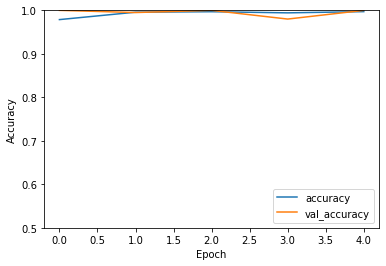

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
model.save("my_model.h5")